In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Data Loading

In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
df.isin(['?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [6]:
print('Duplicated rows:', df.duplicated().sum())

Duplicated rows: 24


In [7]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
categorical_column = df.select_dtypes('object').columns
numerical_column = df.select_dtypes('number').columns

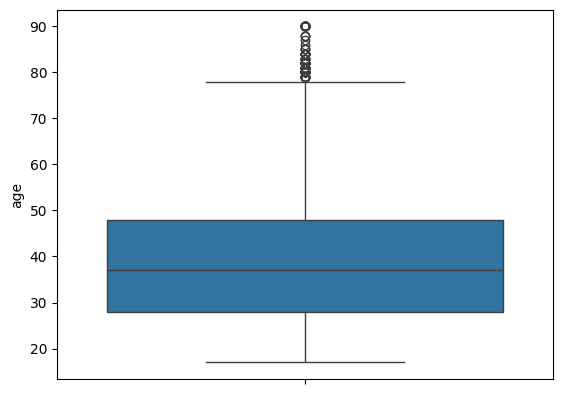

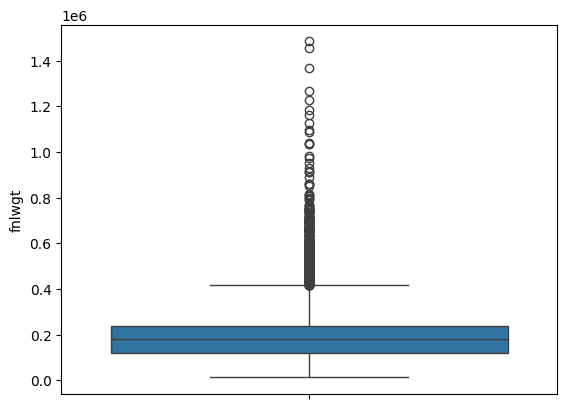

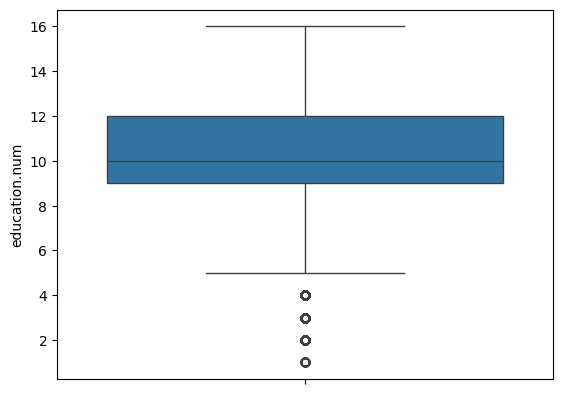

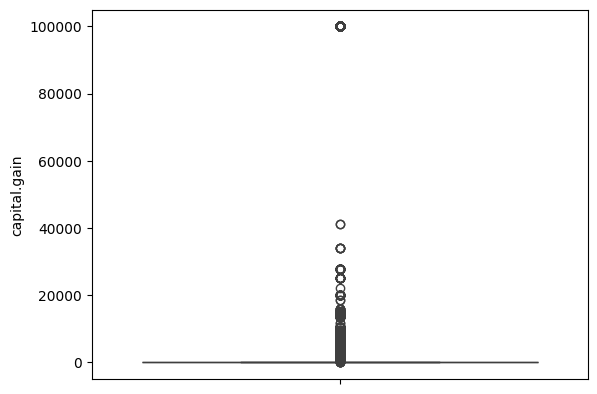

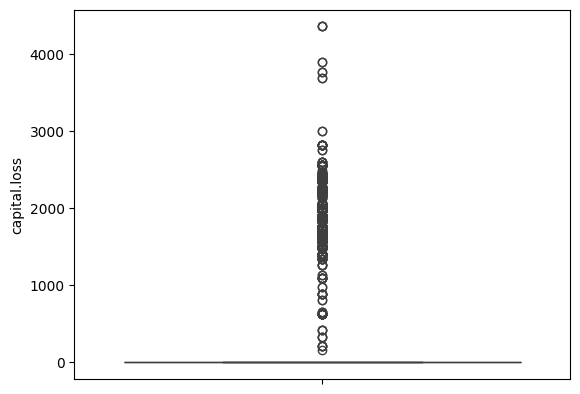

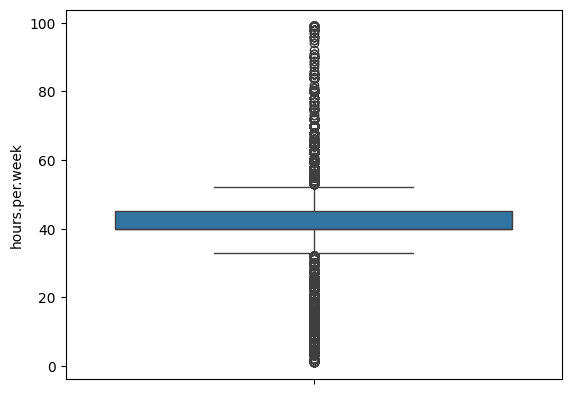

In [9]:
for column in numerical_column:
    sns.boxplot(df[column])
    plt.show()

In [10]:
df[df['relationship']=='Unmarried']['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-spouse-absent'], dtype=object)

In [11]:
df[df['relationship']=='Other-relative']['marital.status'].unique()

array(['Never-married', 'Separated', 'Married-civ-spouse', 'Divorced',
       'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [12]:

for column in categorical_column:
    print('\nColumn:',column)
    print('Values:',df[column].unique())


Column: workclass
Values: ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

Column: education
Values: ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

Column: marital.status
Values: ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

Column: occupation
Values: ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

Column: relationship
Values: ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

Column: race
Values: ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']

Column: sex
Values: ['Female' 'Male']

Col

In [13]:
for i in range (1,17):
    edu = df[df['education.num']==i]['education'].unique()
    print(f"Education.num: {i} -> {edu}")

Education.num: 1 -> ['Preschool']
Education.num: 2 -> ['1st-4th']
Education.num: 3 -> ['5th-6th']
Education.num: 4 -> ['7th-8th']
Education.num: 5 -> ['9th']
Education.num: 6 -> ['10th']
Education.num: 7 -> ['11th']
Education.num: 8 -> ['12th']
Education.num: 9 -> ['HS-grad']
Education.num: 10 -> ['Some-college']
Education.num: 11 -> ['Assoc-voc']
Education.num: 12 -> ['Assoc-acdm']
Education.num: 13 -> ['Bachelors']
Education.num: 14 -> ['Masters']
Education.num: 15 -> ['Prof-school']
Education.num: 16 -> ['Doctorate']


In [14]:
marital_status = df['marital.status'].unique()

for value in marital_status:
    relationship = df[df['marital.status']==value]['relationship'].unique()
    print(f"Marital status: {value} -> {relationship}")

Marital status: Widowed -> ['Not-in-family' 'Unmarried' 'Other-relative' 'Own-child']
Marital status: Divorced -> ['Unmarried' 'Not-in-family' 'Own-child' 'Other-relative']
Marital status: Separated -> ['Own-child' 'Unmarried' 'Not-in-family' 'Other-relative']
Marital status: Never-married -> ['Other-relative' 'Unmarried' 'Not-in-family' 'Own-child']
Marital status: Married-civ-spouse -> ['Husband' 'Not-in-family' 'Wife' 'Other-relative' 'Own-child']
Marital status: Married-spouse-absent -> ['Unmarried' 'Not-in-family' 'Own-child' 'Other-relative']
Marital status: Married-AF-spouse -> ['Husband' 'Wife' 'Own-child' 'Other-relative']


Columns information:
- age: int -> `17 - 90`
- workclass: object -> `Private, State-gov, Federal-gov, Self-emp-not-inc, Self-emp-inc, Local-gov, Without-pay, Never-worked`
- fnlwgt: int -> `12,285 - 1,484,705`
- education: object -> `HS-grad, Some-college, 7th-8th, 10th, Doctorate, Prof-school, Bachelors, Masters, 11th, Assoc-acdm, Assoc-voc, 1st-4th, 5th-6th, 12th, 9th, Preschool`
- education.num: int -> `1 - 16`
- marital.status: object -> `Widowed, Divorced, Separated, Never-married, Married-civ-spouse, Married-spouse-absent, Married-AF-spouse`
- occupation: `Exec-managerial, Machine-op-inspct, Prof-specialty, Other-service, Adm-clerical, Craft-repair, Transport-moving, Handlers-cleaners, Sales, Farming-fishing, Tech-support, Protective-serv, Armed-Forces, Priv-house-serv`
- relationship: object -> `Not-in-family, Unmarried, Own-child, Other-relative, Husband, Wife`
- race: object -> `White, Black, Asian-Pac-Islander, Other, Amer-Indian-Eskimo`
- sex: object -> `Female, Male`
- capital.gain: int -> `0 - 9999`
- capital.loss: int -> `0 - 4356`
- hours.per.week: int -> `1 - 99`
- native.country: object -> `United-States, Mexico, Greece, Vietnam, China, Taiwan, India, Philippines, Trinadad&Tobago, Canada, South, Holand-Netherlands, Puerto-Rico, Poland, Iran, England, Germany, Italy, Japan, Hong, Honduras, Cuba, Ireland, Cambodia, Peru, Nicaragua, Dominican-Republic, Haiti, El-Salvador, Hungary, Columbia, Guatemala, Jamaica, Ecuador, France, Yugoslavia, Scotland, Portugal, Laos, Thailand, Outlying-US(Guam-USVI-etc)`
- income: object -> `<=50K, >50K`

Feature Analysis for Cleaning
- Null columns are written as '?'
- There are 24 duplicated columns
- 'relationship' column is redundant with 'marital.status'

In [15]:
df_cleaned = df.replace('?', None)

df_cleaned.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
df_cleaned.dropna(inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
df_cleaned.drop_duplicates(inplace=True)
print('Duplicated rows:', df_cleaned.duplicated().sum())
df_cleaned.info()

Duplicated rows: 0
<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education.num   30139 non-null  int64 
 5   marital.status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   relationship    30139 non-null  object
 8   race            30139 non-null  object
 9   sex             30139 non-null  object
 10  capital.gain    30139 non-null  int64 
 11  capital.loss    30139 non-null  int64 
 12  hours.per.week  30139 non-null  int64 
 13  native.country  30139 non-null  object
 14  income          30139 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [19]:
df_cleaned.drop('relationship',axis=1,inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 1 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education.num   30139 non-null  int64 
 5   marital.status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   race            30139 non-null  object
 8   sex             30139 non-null  object
 9   capital.gain    30139 non-null  int64 
 10  capital.loss    30139 non-null  int64 
 11  hours.per.week  30139 non-null  int64 
 12  native.country  30139 non-null  object
 13  income          30139 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.4+ MB


In [20]:
# Q1 = df_cleaned[numerical_column].quantile(0.25)
# Q3 = df_cleaned[numerical_column].quantile(0.75)
# IQR = Q3 - Q1

# median = df_cleaned[numerical_column].median()
# df_cleaned[numerical_column] = np.where((df_cleaned[numerical_column] < Q1 - 1.5 * IQR) | (df_cleaned[numerical_column] > Q3 + 1.5 * IQR), median, df_cleaned[numerical_column])

In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 1 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education.num   30139 non-null  int64 
 5   marital.status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   race            30139 non-null  object
 8   sex             30139 non-null  object
 9   capital.gain    30139 non-null  int64 
 10  capital.loss    30139 non-null  int64 
 11  hours.per.week  30139 non-null  int64 
 12  native.country  30139 non-null  object
 13  income          30139 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.4+ MB


In [22]:
df_cleaned.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.897950e+05,10.122532,1092.841202,88.439928,40.934703
std,13.131426,1.056586e+05,2.548738,7409.110596,404.445239,11.978753
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176275e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376045e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [23]:
df_cleaned.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,White,Female,0,3683,40,United-States,<=50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,White,Male,0,2824,45,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,White,Female,0,2824,20,United-States,>50K


# Exploratory Data Analysis

In [24]:
categorical_column = df_cleaned.select_dtypes('object').columns
numerical_column = df_cleaned.select_dtypes('number').columns

categorical_color = sns.color_palette("Set2")
numerical_color = sns.color_palette("viridis", as_cmap=True)

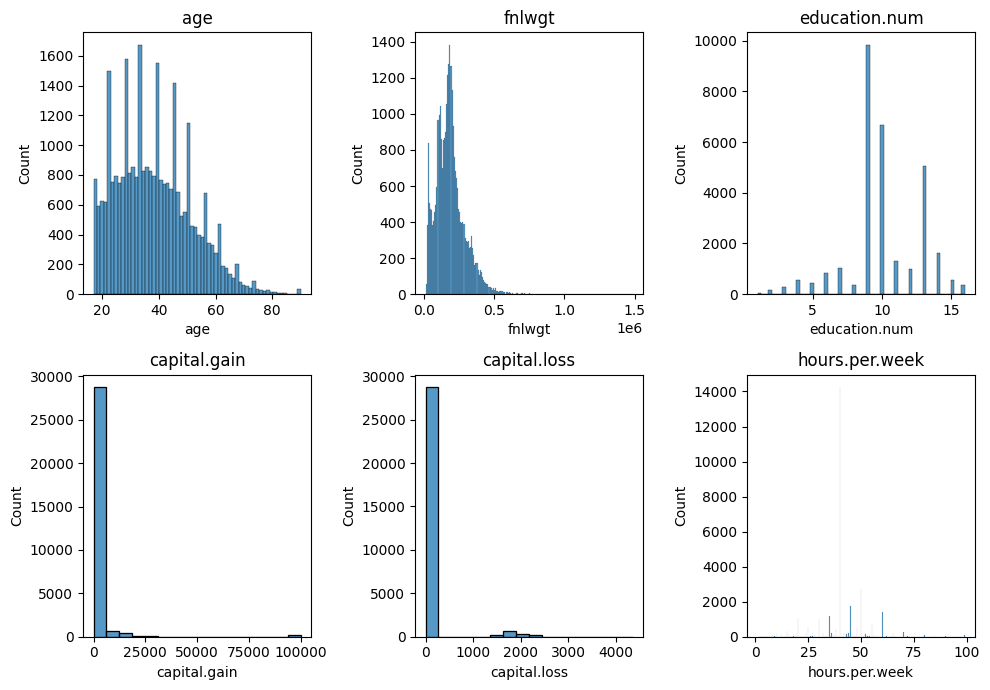

In [25]:
plt.figure(figsize=(10,7))

for i, column in enumerate(numerical_column,1):
    plt.subplot(2,3,i)
    sns.histplot(data=df_cleaned[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

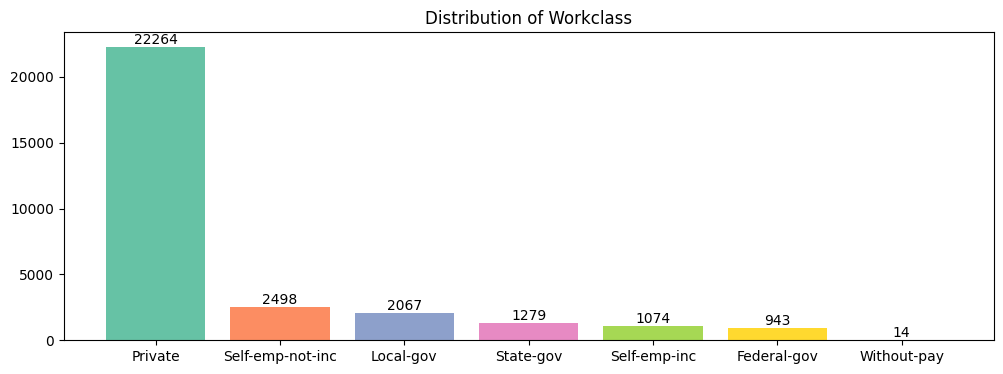

In [26]:
workclass_count = df_cleaned['workclass'].value_counts()

plt.figure(figsize=(12,4))
plt.bar(workclass_count.index, workclass_count, color=categorical_color)
for index,value in enumerate(workclass_count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title("Distribution of Workclass")
plt.show()

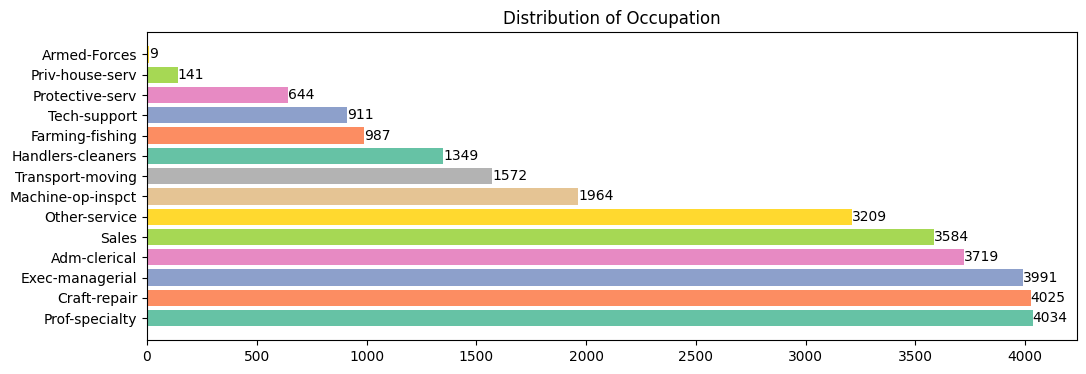

In [27]:
occupation_count = df_cleaned['occupation'].value_counts()

plt.figure(figsize=(12,4))
plt.barh(occupation_count.index, occupation_count, color=categorical_color)
for index,value in enumerate(occupation_count):
    plt.text(value, index, str(value), ha='left', va='center')

plt.title("Distribution of Occupation")
plt.show()

In [28]:
df_cleaned['education'].unique()
edu_labels = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']

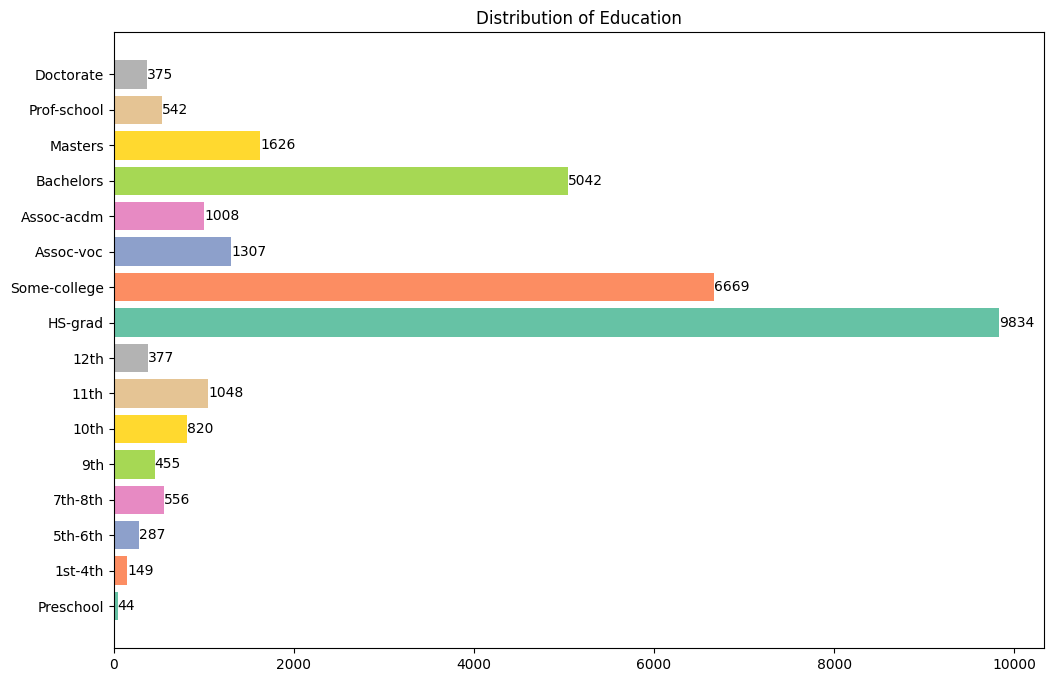

In [29]:
df_cleaned['education'] = pd.Categorical(df_cleaned['education'], categories=edu_labels, ordered=True)

edu_count = df_cleaned['education'].value_counts(sort=False)

plt.figure(figsize=(12,8))
plt.barh(edu_count.index, edu_count, color=categorical_color)
for index,value in enumerate(edu_count):
    plt.text(value, index, str(value), ha='left', va='center')

plt.title("Distribution of Education")
plt.show()

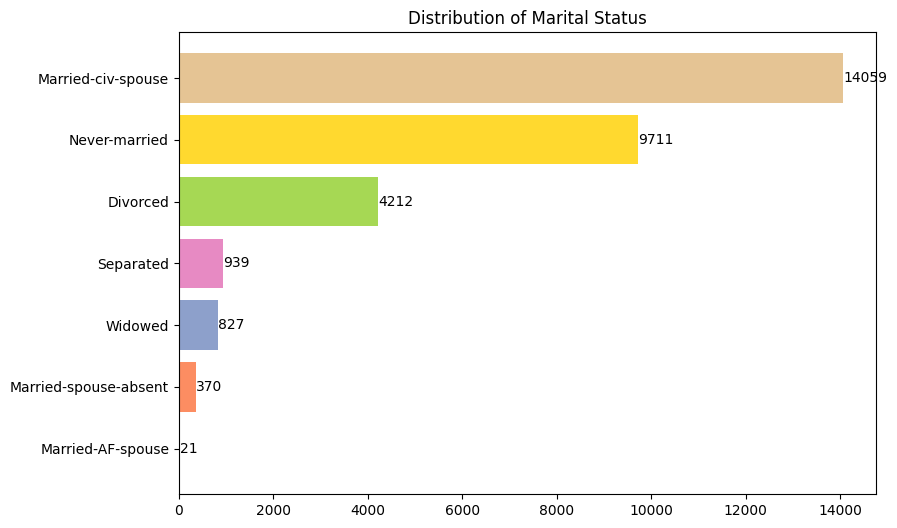

In [30]:
marital_count = df_cleaned['marital.status'].value_counts(ascending=True)

plt.figure(figsize=(9,6))
plt.barh(marital_count.index, marital_count, color=categorical_color)
for index,value in enumerate(marital_count):
    plt.text(value, index, str(value), ha='left', va='center')

plt.title("Distribution of Marital Status")
plt.show()

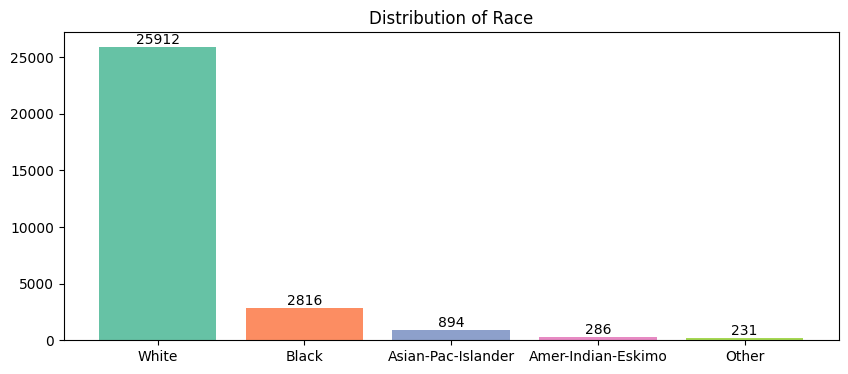

In [31]:
race_count = df_cleaned['race'].value_counts()

plt.figure(figsize=(10,4))
plt.bar(race_count.index, race_count, color=categorical_color)
for index,value in enumerate(race_count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title("Distribution of Race")
plt.show()

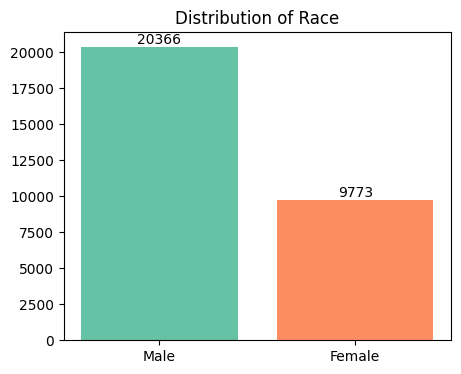

In [32]:
sex_count = df_cleaned['sex'].value_counts()

plt.figure(figsize=(5,4))
plt.bar(sex_count.index, sex_count, color=categorical_color)
for index,value in enumerate(sex_count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title("Distribution of Race")
plt.show()

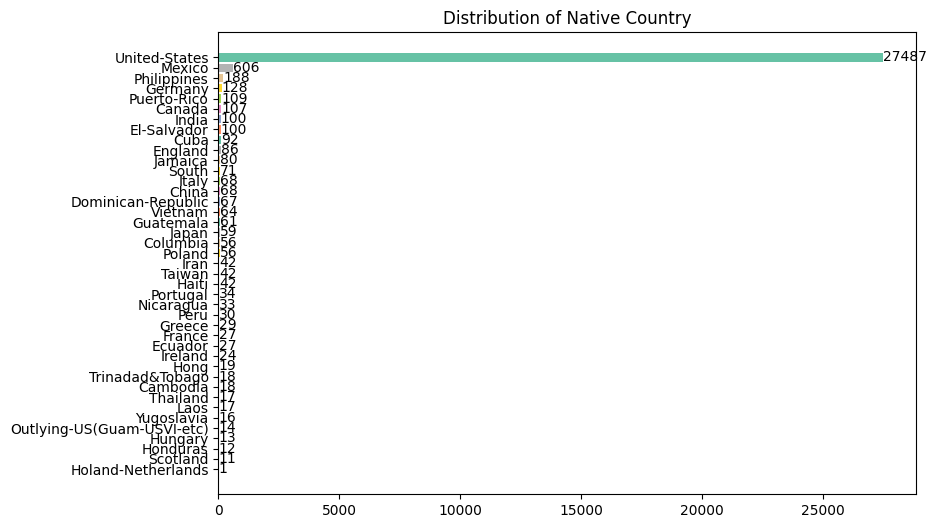

In [33]:
country_count = df_cleaned['native.country'].value_counts(ascending=True)

plt.figure(figsize=(9,6))
plt.barh(country_count.index, country_count, color=categorical_color)
for index,value in enumerate(country_count):
    plt.text(value, index, str(value), ha='left', va='center')

plt.title("Distribution of Native Country")
plt.show()

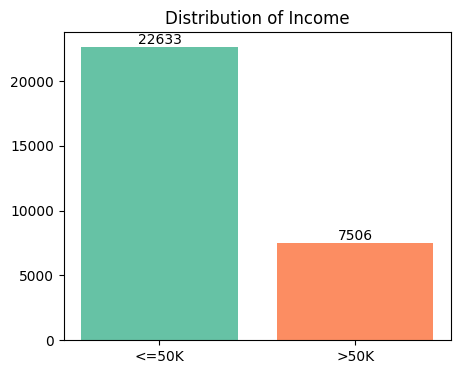

In [34]:
income_count = df_cleaned['income'].value_counts()

plt.figure(figsize=(5,4))
plt.bar(income_count.index, income_count, color=categorical_color)
for index,value in enumerate(income_count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title("Distribution of Income")
plt.show()

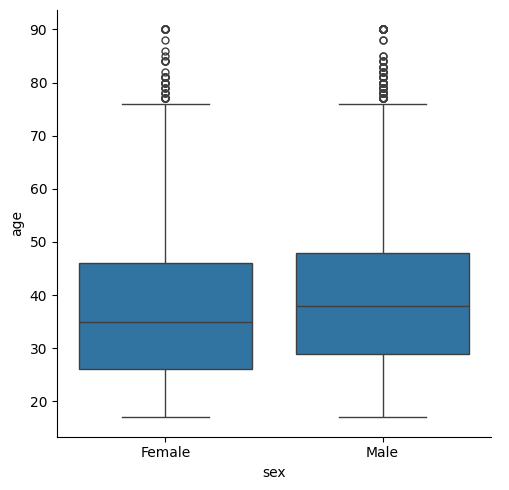

In [35]:
sns.catplot(data=df_cleaned, x='sex', y='age', kind='box')
plt.tight_layout()
plt.show()

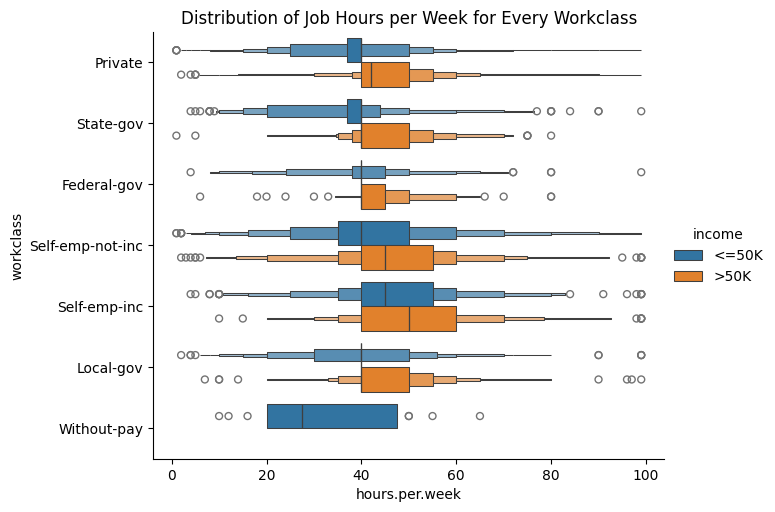

In [36]:
sns.catplot(data=df_cleaned, x='hours.per.week', y='workclass', kind='boxen', hue='income', height=5, aspect=1.4)
plt.title('Distribution of Job Hours per Week for Every Workclass')
plt.show()

# Data Preprocessing

In [37]:
df_scaled = df_cleaned.copy() 

scaler = StandardScaler()
df_scaled[numerical_column] = scaler.fit_transform(df_cleaned[numerical_column])
df_scaled

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,3.317157,Private,-0.538773,HS-grad,-0.440434,Widowed,Exec-managerial,White,Female,-0.147502,10.551814,-1.914647,United-States,<=50K
3,1.184832,Private,-0.467892,7th-8th,-2.402221,Divorced,Machine-op-inspct,White,Female,-0.147502,9.424325,-0.078031,United-States,<=50K
4,0.194824,Private,0.708595,Some-college,-0.048076,Separated,Prof-specialty,White,Female,-0.147502,9.424325,-0.078031,United-States,<=50K
5,-0.338257,Private,0.256197,HS-grad,-0.440434,Divorced,Other-service,White,Female,-0.147502,9.102892,0.339381,United-States,<=50K
6,-0.033639,Private,-0.370956,10th,-1.617506,Separated,Adm-clerical,White,Male,-0.147502,9.102892,-0.078031,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-1.252110,Private,1.139131,Some-college,-0.048076,Never-married,Protective-serv,White,Male,-0.147502,-0.218673,-0.078031,United-States,<=50K
32557,-0.871338,Private,0.638926,Assoc-acdm,0.736639,Married-civ-spouse,Tech-support,White,Female,-0.147502,-0.218673,-0.244996,United-States,<=50K
32558,0.118670,Private,-0.335246,HS-grad,-0.440434,Married-civ-spouse,Machine-op-inspct,White,Male,-0.147502,-0.218673,-0.078031,United-States,>50K
32559,1.489450,Private,-0.358567,HS-grad,-0.440434,Widowed,Adm-clerical,White,Female,-0.147502,-0.218673,-0.078031,United-States,<=50K


In [38]:
categorical_column = ['workclass', 'education', 'marital.status', 'occupation', 'race', 'sex', 'native.country']

df_encoded = pd.get_dummies(df_scaled, columns=categorical_column)
df_encoded['income'] = df_encoded['income'].replace(['<=50K','>50K'], [0,1])

df_encoded.head()

C:\Users\frend\AppData\Local\Temp\ipykernel_45936\2060405128.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_encoded['income'] = df_encoded['income'].replace(['<=50K','>50K'], [0,1])


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,3.317157,-0.538773,-0.440434,-0.147502,10.551814,-1.914647,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,1.184832,-0.467892,-2.402221,-0.147502,9.424325,-0.078031,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,0.194824,0.708595,-0.048076,-0.147502,9.424325,-0.078031,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
5,-0.338257,0.256197,-0.440434,-0.147502,9.102892,0.339381,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
6,-0.033639,-0.370956,-1.617506,-0.147502,9.102892,-0.078031,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [39]:
# df_encoded = df_scaled.copy()
# label_encoder = LabelEncoder()

# for column in categorical_column:
#     df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# df_encoded.head()

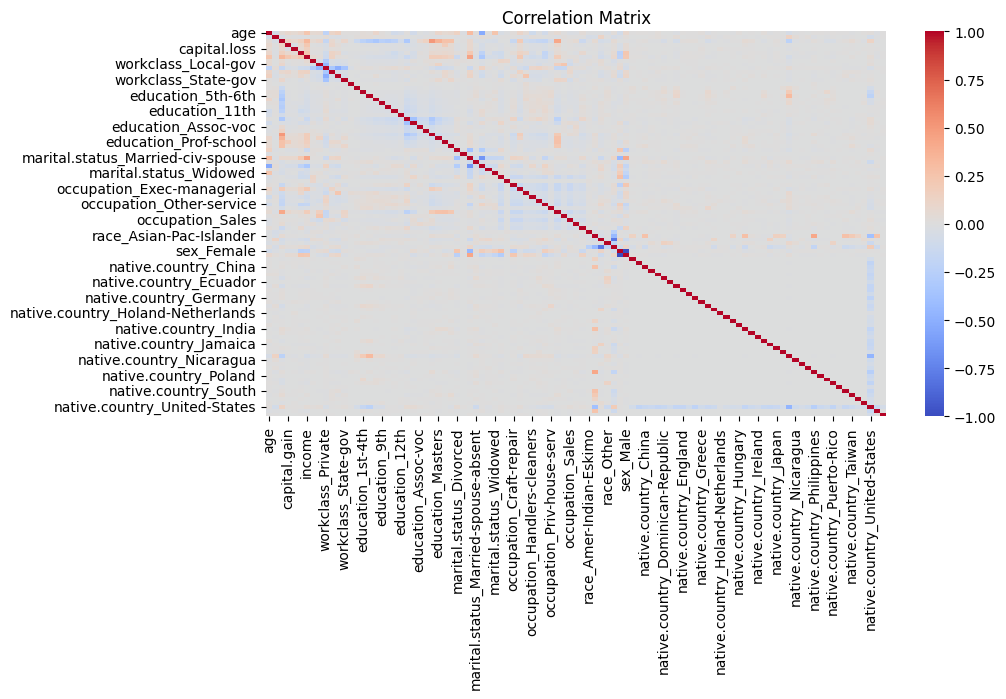

In [40]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df_encoded.corr(),cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [41]:
# df_encoded.drop(['education', 'marital.status'], axis=1, inplace=True)
# df_encoded.info()

# Data Splitting

In [42]:
X = df_encoded.drop(['income'], axis=1)
y = df_encoded['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

print('Train size:',X_train.shape)
print('Test size:',X_test.shape)

Train size: (19590, 98)
Test size: (10549, 98)


In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Model Training

## Basic Models

In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

logistic = LogisticRegression()
KNN = KNeighborsClassifier()
DT = DecisionTreeClassifier()
SVM = SVC()

logistic.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)
SVM.fit(X_train, y_train)

print("Model training finished")

Model training finished


Accuracy: 0.8481
Precision: 0.7274
Recall: 0.6087
F1-Score: 0.6627


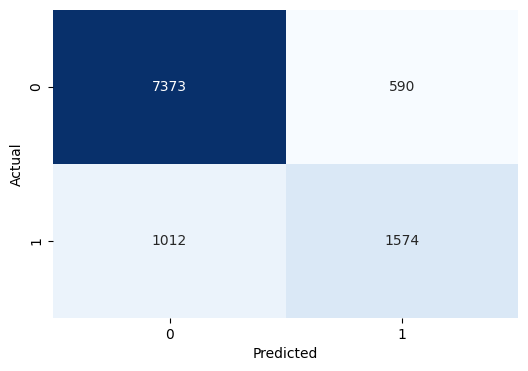

In [45]:
y_pred_logistic = logistic.predict(X_test)
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_logistic):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_logistic):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_logistic):.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.8278
Precision: 0.6599
Recall: 0.6137
F1-Score: 0.6359


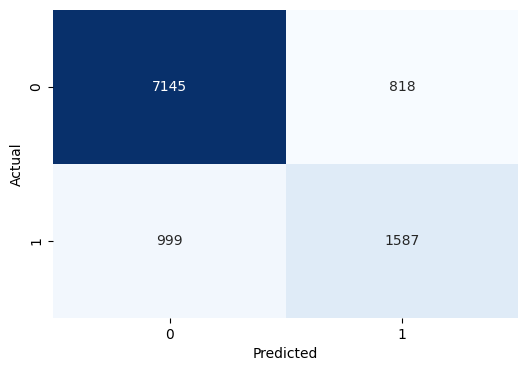

In [46]:
y_pred_knn = KNN.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn):.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.8098
Precision: 0.6103
Recall: 0.6206
F1-Score: 0.6154


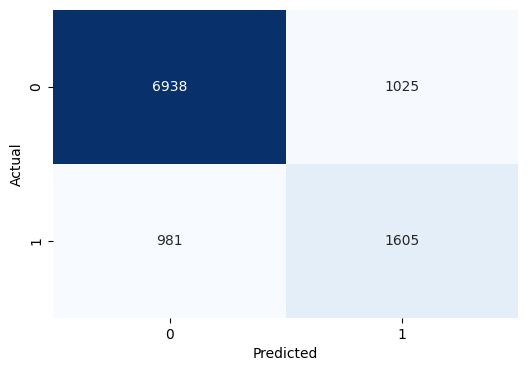

In [47]:
y_pred_dt = DT.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.8536
Precision: 0.7517
Recall: 0.6017
F1-Score: 0.6684


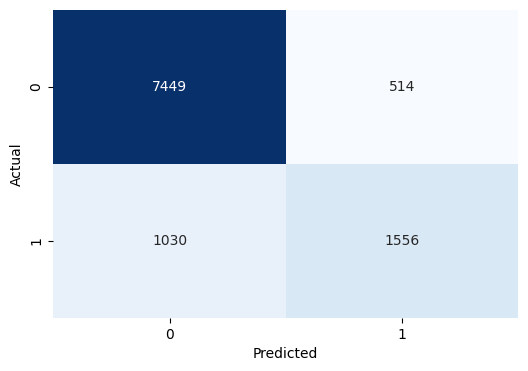

In [48]:
y_pred_svc = SVM.predict(X_test)
cm_svc = confusion_matrix(y_test, y_pred_svc)

print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_svc):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_svc):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svc):.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Bootstrap Aggregating Model

In [49]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

Accuracy: 0.8497
Precision: 0.7189
Recall: 0.6350
F1-Score: 0.6743


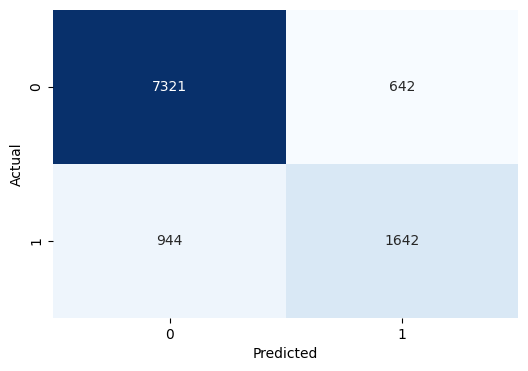

In [50]:
y_pred_rf = RF.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Boosting Model

In [51]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

base_model = DecisionTreeClassifier()
adaBoost = AdaBoostClassifier(base_model, algorithm='SAMME')
gb = GradientBoostingClassifier()

adaBoost.fit(X_train, y_train)
gb.fit(X_train, y_train)

print('Model training finished')

C:\Users\frend\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Model training finished


Accuracy: 0.8162
Precision: 0.6236
Recall: 0.6311
F1-Score: 0.6273


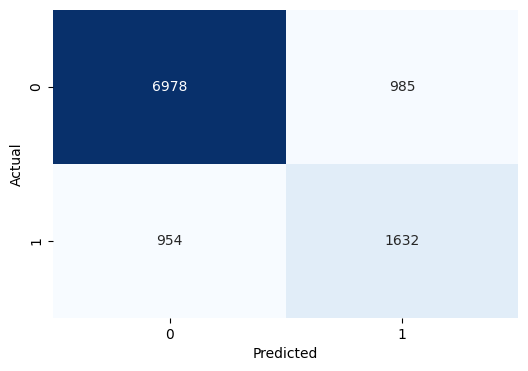

In [52]:
y_pred_adaBoost = adaBoost.predict(X_test)
cm_adaBoost = confusion_matrix(y_test, y_pred_adaBoost)

print(f"Accuracy: {accuracy_score(y_test, y_pred_adaBoost):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_adaBoost):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_adaBoost):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_adaBoost):.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm_adaBoost, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.8623
Precision: 0.7694
Recall: 0.6257
F1-Score: 0.6901


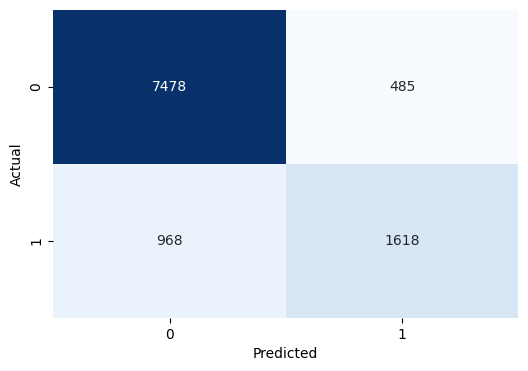

In [53]:
y_pred_gb = gb.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_gb)

print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_gb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_gb):.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Parameter tuning for GradientBoostingClassifier

In [54]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

random_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_distributions=param_dist, cv=5, n_iter=27, scoring='accuracy', n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_gb = random_search.best_estimator_

print("Best Hyperparameters found by RandomizedSearchCV:")
print(best_params)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters found by RandomizedSearchCV:
{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}


Accuracy: 0.8718
Precision: 0.7810
Recall: 0.6632
F1-Score: 0.7173


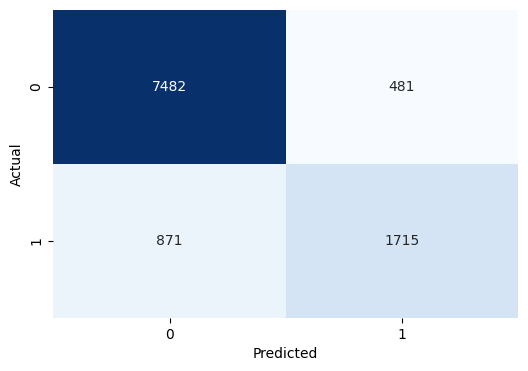

In [55]:
y_pred_tuned = best_gb.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred_tuned)

print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_tuned):.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Result

The best performing model is Gradient Boosting Classifier with 87.18% Accuracy, 78.10% Precission, 66.32% recall, and 71.73% F1-Score